In [94]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import sklearn
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression



# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

Text(0.5,1,'Logistic Function')

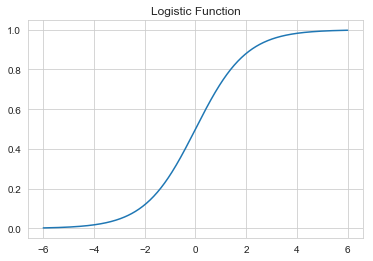

In [49]:
def logistic(t):
    
    return 1 / (1 + math.exp((-1)*t))

t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title('Logistic Function')
    

In [50]:
#fair is the affair dataset
df = sm.datasets.fair.load_pandas().data

In [51]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [52]:
def affair_check(affair):
    if(affair > 0):
        return 1  
    else:
        return 0
    
df['Had_Affair'] = df.affairs.apply(affair_check)

In [53]:
df.tail(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
6356,5.0,32.0,13.0,3.0,3.0,12.0,3.0,5.0,0.0,0
6357,5.0,32.0,13.0,4.0,2.0,14.0,4.0,4.0,0.0,0
6358,3.0,27.0,6.0,2.0,4.0,14.0,3.0,1.0,0.0,0
6359,4.0,22.0,2.5,0.0,3.0,16.0,5.0,5.0,0.0,0
6360,5.0,22.0,2.5,0.0,2.0,14.0,3.0,3.0,0.0,0
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [55]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


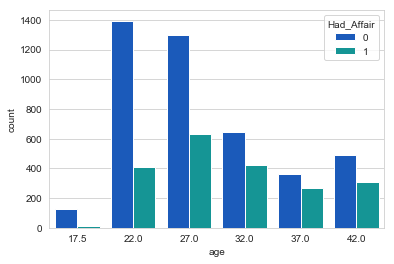

In [56]:
sns.countplot(x='age',data=df,hue='Had_Affair',palette='winter')

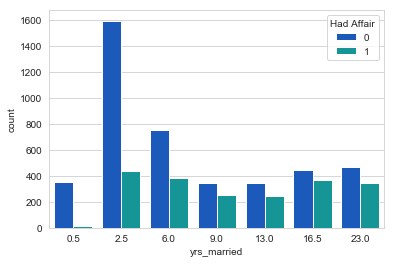

In [17]:
sns.countplot(x='yrs_married',data=df,hue='Had Affair',palette='winter')

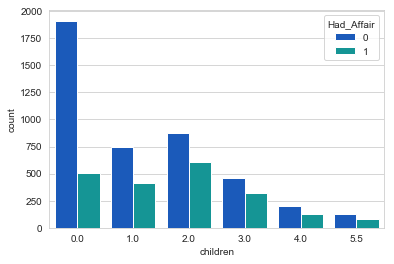

In [57]:
sns.countplot(x='children',data=df,hue='Had_Affair',palette='winter')

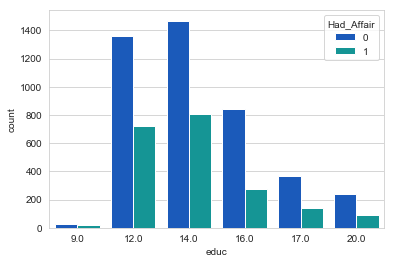

In [58]:
sns.countplot(x='educ',data=df,hue='Had_Affair',palette='winter')

Part 5: Data Preparation
If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Variables. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy variables and creating new columns from them.

In [59]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [81]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [82]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [83]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [84]:
X = pd.concat([X,dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [85]:
Y = df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [86]:
Y = np.ravel(Y)

In [87]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
#to avoid Multicollinearity Consideration we will be dropping one of the dummy columns since we can linearly precict one of the dummy colums

In [88]:
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)
X = X.drop('affairs',axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [89]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.72588752748978946

In [90]:
Y.mean()

0.32249450204209867

In [91]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [92]:
coeff_df

,0,1
0,rate_marriage,[-0.697924125998]
1,age,[-0.0563646299078]
2,yrs_married,[0.103919041638]
3,children,[0.0181622363802]
4,religious,[-0.368517662336]
5,educ,[0.00875505261517]
6,occ2,[0.298052262971]
7,occ3,[0.607992729515]
8,occ4,[0.346221679741]
9,occ5,[0.942505111823]


In [95]:
# Split the data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)

0.721733668342


Now we have a 72.17accuracy score, which is basically the same as our previous accuracy score, 72.58%.